# Neil Shah: CUNY 621:  Blog 4
# Residual Analysis, GLM and Robust Regressions

In my last [blog post](https://github.com/shahneilp/DATA621-Blogs/blob/master/Blog3--Simple%20Regression.ipynb), we built upon our fundamental thesis that there is an economic link between ethanol (a blending component in gasoline) and gasoline prices. We found a positive correlation between certain time periods, specifically post 02-2020 due to what might be COVID.

After identifying a correlation, we built a simple OLS regression model with test/train splits to avoid overfitting, and ran multiple iterations/regression fits, and achieved a R^2 of around .6ish, showing that there was a positive correlation between the series.

In [1]:
#Importing our friends 
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

Let's reload the trimmed data from 02-2020 onward. 

In [2]:
#Loading data set
ethanol=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/sampledata.csv',header=0,index_col=0,parse_dates=True)
gasoline=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/blog2sample.csv',header=0,index_col=0,parse_dates=True)
#combining them
df=pd.DataFrame(data=ethanol.copy())
df['Gasoline']=gasoline
df.columns=['Ethanol','Gasoline']
#Make a clean copy of the data
data=df.loc['02-2020':].copy()

Just for simplicity I will replot the two data which shows the somewhat linear trend that we built off of

Text(0.5, 0, 'Gasoline (cents per gallon)')

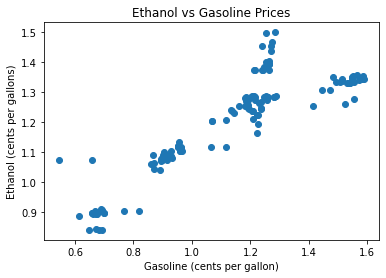

In [32]:
X=data['Gasoline'].values
y=data['Ethanol'].values
plt.scatter(X,y)
plt.title('Ethanol vs Gasoline Prices')
plt.ylabel('Ethanol (cents per gallons)')
plt.xlabel('Gasoline (cents per gallon)')

Now one of the assumptions for an OLS was that our errors (residuals--which are the different between the predicted and true) are normally distributed, and hence I wanted to tie the first blog (about normality) with my last blog post in which we developed our OLS.

Let's check our residuals on the entire dataset. 

In [23]:
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'OLS Residual Plot')

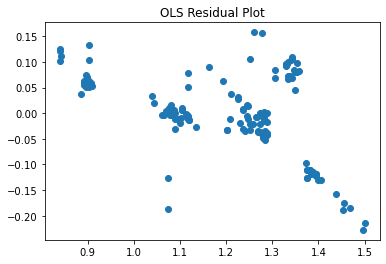

In [26]:
lm.fit(X.reshape(-1,1),y.reshape(-1,1))
y_pred=lm.predict(X.reshape(-1,1))
#Calculating the residuals
residuals=y_pred-y.reshape(-1,1)
#Plotting residuals 
plt.scatter(x=y,y=residuals)
plt.title('OLS Residual Plot')

Text(0.5, 1.0, 'Histogram of Residuals')

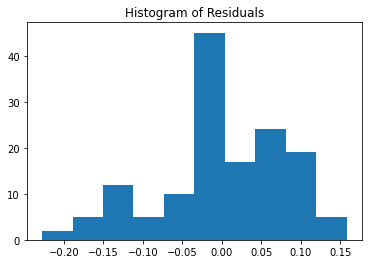

In [29]:
plt.hist(residuals)
plt.title('Histogram of Residuals')

Looking at the residual plot there is a sign of hetrodscedacity--or that there isn't a constant variance between our two variables. The residuals don't look to be randomly distributed, nor really normal from the histogram,  but we can use the shapiro test just to make sure (from blog 1)

In [27]:
shapiro(residuals)

(0.956000566482544, 0.00015000147686805576)

Using a critical value of .05 our test statistic is 0.001 and less than .05; we therefore REJECT the null hypothesi that our data (residuals) came froma normal distribution.

Oh no--do we throw out the entire model?

Not necesarrily--based on my reading of [Gauss-Markov Theorey](https://stats.stackexchange.com/questions/29731/regression-when-the-ols-residuals-are-not-normally-distributed), this doesn't automatically preclude the OLS model but I wanted to look at other models.  

Well based on my literature review I read about the use of GLM, or generalized linear models, that relax the rule of normally distributed residuals. I found this blog post that detailed on an application of the [Huber Regressor within a GLM](https://towardsdatascience.com/generalized-huber-regression-505afaff24c) and wanted to try it out.

Not only would this help with our residuals (which were not normally distributed in the OLS) but the Huber Regressor inconporates a [Huber Loss function](https://en.wikipedia.org/wiki/Huber_loss) which is a modification of the least square error, that is less suspectible to outliers and hence more robust.


## Huber Regression Model

In [6]:
#First lets import the HuberRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor

And now like the last blog post use Scikit to make a test train split and calculate our R^2

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Implementing Huber
huber=HuberRegressor()

huber.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
#Predict
y_pred=huber.predict(X_test.reshape(-1,1))
huber.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6463654476904502

Let's run the GLM regression again a few times to once again and see the range of R-squared

c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was 

c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was 

Text(0.5, 1.0, 'Rsquared from Huber Regressions')

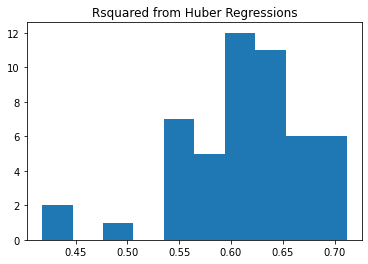

In [39]:
X=data['Gasoline'].values
y=data['Ethanol'].values
X=X.reshape(-1,1)
y=y.reshape(-1,1)
rsquare=[]
#running n iterations
for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    huber.fit(X_train,y_train)
    y_pred=huber.predict(X_test)
    rsquare.append(huber.score(y_test,y_pred))
plt.hist(rsquare)
plt.title('Rsquared from Huber Regressions')

The average Rsquared we saw was around 0.60 using the Huber Regression--which is around the same as our OLS from the last blog.

Maybe we need another metric to compare models and R^2 isn't the best.....topic for next time?